# Linea E

Hipotesis: 
La cercanía a las estaciones de la linea E influye en el precio de las propiedades, para esto tomaremos los barrios que son recorridos por la linea A y veremos si la distancia a las paradas de esta influye en el precio de las propiedades.
Primer approach: tomamos cada barrio vemos cuales son las distancias de sus propiedades a las paradas, y tomamos la menor. Luego realizamos un scatter plot con estos datos y vemos si la distribucion del precio influye en ésta.

La línea E pasa por: Monserrat, Constitucion, San cristobal, boedo, Parque chacabuco, Parque avellaneda.

In [1]:
import datetime as datetime
import codecs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

#Data de properati
df = pd.read_csv('/home/martin/Documents/jupyter/datos_procesados.csv')

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal']

propCFf = propCF[['property_type','place_name','rooms','lat','lon','price']]

propRecorridoE= propCFf[propCFf.place_name.str.contains('Monserrat') |
                        propCFf.place_name.str.contains('Constitucion')| #No hay datos de San Nicolas
                        propCFf.place_name.str.contains('San Cristobal')|
                        propCFf.place_name.str.contains('Boedo')|
                        propCFf.place_name.str.contains('Parque Chacabuco')|
                        propCFf.place_name.str.contains('Parque Avellaneda')]

propRecorridoE.dropna(inplace = True)
propRecorridoE.info()

/home/martin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,4,5,6,9,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874 entries, 362163 to 493338
Data columns (total 6 columns):
property_type    1874 non-null object
place_name       1874 non-null object
rooms            1874 non-null float64
lat              1874 non-null float64
lon              1874 non-null float64
price            1874 non-null float64
dtypes: float64(4), object(2)
memory usage: 102.5+ KB


/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
df = pd.read_csv('/home/martin/Documents/jupyter/estaciones-de-subte.csv', encoding = "ISO-8859-1")

estacionesE = df[df['LINEA'] == 'E']
estacionesE.head(20)

,X,Y,ID,ESTACION,LINEA
43,-58.373684,-34.609242,44.0,BOLIVAR,E
44,-58.377581,-34.612849,45.0,BELGRANO,E
45,-58.381535,-34.617937,46.0,INDEPENDENCIA,E
46,-58.385149,-34.622339,47.0,SAN JOSE,E
47,-58.391512,-34.622720,48.0,ENTRE RIOS - RODOLFO WALSH,E
48,-58.397068,-34.623110,49.0,PICHINCHA,E
49,-58.402937,-34.623866,50.0,JUJUY,E
50,-58.409391,-34.624654,51.0,URQUIZA,E
51,-58.433816,-34.628018,52.0,JOSE MARIA MORENO,E
52,-58.442171,-34.631042,53.0,EMILIO MITRE,E


In [3]:
i = 1
for index, row in estacionesE.iterrows():
    lon = estacionesE.loc[index,'X']
    lat = estacionesE.loc[index,'Y']
    label = str(i)
    propRecorridoE['lon' + label] = lon
    propRecorridoE['lat' + label] = lat
    i = i+1

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [4]:
import math

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(np.sin(rad*dlat/2))**2 + np.cos(rad*lat1)*np.cos(rad*lat2)*(np.sin(rad*dlon/2))**2
    distancia=2*R*np.arcsin(np.sqrt(a))
    distM = distancia*1000
    return distM

In [6]:
for row in estacionesE.iterrows():
    for i in range(1,16):
        label = str(i)
        lat1 = propRecorridoE['lat'].astype(float)
        lon1 = propRecorridoE['lon'].astype(float)
        lat2 = propRecorridoE['lat'+ label].astype(float)
        lon2 = propRecorridoE['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoE['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoE['dist' + label] = dist

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [10]:
propRecorridoE.head(5)

,property_type,place_name,rooms,lat,lon,price,lon1,lat1,lon2,lat2,...,dist6,dist7,dist8,dist9,dist10,dist11,dist12,dist13,dist14,dist15
362163,house,Boedo,4.0,-34.630217,-58.425291,350000.0,-58.373684,-34.609242,-58.377581,-34.612849,...,2701.368571,2164.518515,1581.360141,817.700585,1547.552282,2387.585276,381.593995,1043.450049,3632.311047,3180.964163
362316,apartment,Boedo,2.0,-34.626769,-58.425204,127500.0,-58.373684,-34.609242,-58.377581,-34.612849,...,2607.138229,2063.464386,1466.299982,800.386936,1623.951839,2532.006998,147.654227,898.791234,3809.422559,3340.673101
362317,apartment,San Cristobal,1.0,-34.623391,-58.398126,1409000.0,-58.373684,-34.609242,-58.377581,-34.612849,...,101.731953,443.473316,1040.579838,3306.887410,4120.023085,4987.220957,2654.238318,1608.292351,6221.678365,5778.195595
362363,apartment,San Cristobal,1.0,-34.622886,-58.391597,965600.0,-58.373684,-34.609242,-58.377581,-34.612849,...,501.369558,1043.591679,1640.450320,3906.090362,4716.789032,5576.660303,3253.590977,2208.082822,6801.907837,6363.456643
362625,apartment,Boedo,1.0,-34.629407,-58.412741,70000.0,-58.373684,-34.609242,-58.377581,-34.612849,...,1596.325994,1088.615037,611.142692,1935.033676,2699.561836,3522.023757,1312.933354,516.975590,4735.707575,4300.931622


In [12]:
propRecorridoE['min_dist'] =propRecorridoE.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11','dist12','dist13','dist14','dist15']].min(axis=1)
propRecorridoE.head()

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,property_type,place_name,rooms,lat,lon,price,lon1,lat1,lon2,lat2,...,dist7,dist8,dist9,dist10,dist11,dist12,dist13,dist14,dist15,min_dist
362163,house,Boedo,4.0,-34.630217,-58.425291,350000.0,-58.373684,-34.609242,-58.377581,-34.612849,...,2164.518515,1581.360141,817.700585,1547.552282,2387.585276,381.593995,1043.450049,3632.311047,3180.964163,381.593995
362316,apartment,Boedo,2.0,-34.626769,-58.425204,127500.0,-58.373684,-34.609242,-58.377581,-34.612849,...,2063.464386,1466.299982,800.386936,1623.951839,2532.006998,147.654227,898.791234,3809.422559,3340.673101,147.654227
362317,apartment,San Cristobal,1.0,-34.623391,-58.398126,1409000.0,-58.373684,-34.609242,-58.377581,-34.612849,...,443.473316,1040.579838,3306.887410,4120.023085,4987.220957,2654.238318,1608.292351,6221.678365,5778.195595,101.731953
362363,apartment,San Cristobal,1.0,-34.622886,-58.391597,965600.0,-58.373684,-34.609242,-58.377581,-34.612849,...,1043.591679,1640.450320,3906.090362,4716.789032,5576.660303,3253.590977,2208.082822,6801.907837,6363.456643,20.049766
362625,apartment,Boedo,1.0,-34.629407,-58.412741,70000.0,-58.373684,-34.609242,-58.377581,-34.612849,...,1088.615037,611.142692,1935.033676,2699.561836,3522.023757,1312.933354,516.975590,4735.707575,4300.931622,516.975590


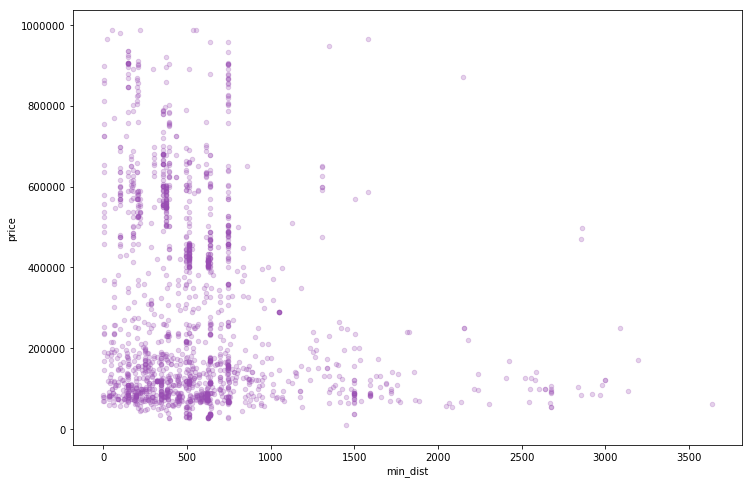

In [30]:
%matplotlib inline
propRecorridoE1 = propRecorridoE[propRecorridoE['price']< 1000000]
propRecorridoE2 = propRecorridoE1[propRecorridoE1['min_dist']< 4000]
propRecorridoE2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color=(0.6,0.3,0.7))